# ME314 Homework 1

Qingyuan Chen 


In [1]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Custom display helpers
from IPython.display import Markdown

def md_print(md_str: str):
    display(Markdown(md_str))

def lax_eq(equation):
    return sym.latex(equation , mode='inline')

---
## Problem1 

Find acceleration of two blocks

In [3]:
# Problem 1 

def problem_1():

    x1 , x2 = sym.symbols(r'x_1,x_2')
    x1ddot , x2ddot = sym.symbols(r'\ddot{x_1} , \ddot{x_2}') # acceleration
    k1 , k2 = sym.symbols(r'k_1,k_2') # spring constants
    m1 , m2 = sym.symbols(r"m_1 , m_2")

    
    # F = ma 
    # F = k Delta_x
    # F = ma = k Delta_x 
    x1dd_eq = sym.Eq(m1 * x1ddot , k1*(-x1)+k2*(x2-x1))
    x2dd_eq = sym.Eq(m2 * x2ddot, k2*(-x2+x1) )
    
    md_print(f"equations :  {lax_eq(x1dd_eq)} and {lax_eq(x2dd_eq)}  " )

    physics_constants_subsituion = [(k1,0.5) , (k2,0.8) , (m1 , 1) , (m2 , 2)]
    x1dd_eq = x1dd_eq.subs(physics_constants_subsituion)
    x2dd_eq = x2dd_eq.subs(physics_constants_subsituion)
    md_print(f"with physics constants pluged in:  {lax_eq(x1dd_eq)} and {lax_eq(x2dd_eq)}  " )

    x1ddot_solved = sym.solve(x1dd_eq,x1ddot)[0]
    x2ddot_solved = sym.solve(x2dd_eq,x2ddot)[0]

    x1ddot_func = sym.lambdify([x1,x2] , x1ddot_solved)
    x2ddot_func = sym.lambdify([x1,x2] , x2ddot_solved)
    md_print(f"### Problem 1 solution")
    md_print(f"**solved $\ddot{{x_1}}$ = {lax_eq(x1ddot_solved)}**")
    md_print(f"**solved $\ddot{{x_2}}$ = {lax_eq(x2ddot_solved)}**")

    md_print(f"**with $x_1=1,x_2=3$ => $\ddot{{x_1}}$ = {x1ddot_func(1,3):.3f}, $\ddot{{x_2}}$ = {x2ddot_func(1,3):.3f}**")

problem_1()


equations :  $\ddot{x_1} m_{1} = - k_{1} x_{1} + k_{2} \left(- x_{1} + x_{2}\right)$ and $\ddot{x_2} m_{2} = k_{2} \left(x_{1} - x_{2}\right)$  

with physics constants pluged in:  $\ddot{x_1} = - 1.3 x_{1} + 0.8 x_{2}$ and $2 \ddot{x_2} = 0.8 x_{1} - 0.8 x_{2}$  

### Problem 1 solution

**solved $\ddot{x_1}$ = $- 1.3 x_{1} + 0.8 x_{2}$**

**solved $\ddot{x_2}$ = $0.4 x_{1} - 0.4 x_{2}$**

**with $x_1=1,x_2=3$ => $\ddot{x_1}$ = 1.100, $\ddot{x_2}$ = -0.800**

---
## Problem 2

Compute L of same system as problem 1

In [4]:
# Problem 2 

# def problem_2():
t = sym.symbols('t')
x1 = sym.Function(r'x_1')(t)
x1dot = x1.diff(t)
x1ddot = x1dot.diff(t)
x2 = sym.Function(r'x_2')(t)
x2dot = x2.diff(t)
x2ddot = x2dot.diff(t)

k1 , k2 = sym.symbols(r'k_1,k_2') # spring constants
m1 , m2 = sym.symbols(r"m_1 , m_2")

# K = KE - V

kinetic = 0.5 * m1 * (x1dot**2) + 0.5 * m2 *(x2dot**2)
md_print(f"KE of system: {lax_eq(kinetic)}")

potential = 0.5*k1*(x1**2) + 0.5 * k2 * ( (x1-x2)**2 )
md_print(f"V of system: {lax_eq(potential)}")

p2_lagrangian = kinetic - potential
physics_constants_subsituion = [(k1,0.5) , (k2,0.8) , (m1 , 1) , (m2 , 2)]
p2_lagrangian = p2_lagrangian.subs(physics_constants_subsituion)

md_print("### Problem 2 solution:")
md_print(f"**L of systme: {lax_eq(p2_lagrangian)}**")

KE of system: $0.5 m_{1} \left(\frac{d}{d t} \operatorname{x_{1}}{\left(t \right)}\right)^{2} + 0.5 m_{2} \left(\frac{d}{d t} \operatorname{x_{2}}{\left(t \right)}\right)^{2}$

V of system: $0.5 k_{1} \operatorname{x_{1}}^{2}{\left(t \right)} + 0.5 k_{2} \left(\operatorname{x_{1}}{\left(t \right)} - \operatorname{x_{2}}{\left(t \right)}\right)^{2}$

### Problem 2 solution:

**L of systme: $- 0.4 \left(\operatorname{x_{1}}{\left(t \right)} - \operatorname{x_{2}}{\left(t \right)}\right)^{2} - 0.25 \operatorname{x_{1}}^{2}{\left(t \right)} + 0.5 \left(\frac{d}{d t} \operatorname{x_{1}}{\left(t \right)}\right)^{2} + 1.0 \left(\frac{d}{d t} \operatorname{x_{2}}{\left(t \right)}\right)^{2}$**

---
## Problem 3 

compute eular-Lagrange

In [5]:

p3_q= sym.Matrix([x1,x2])
p3_qdot= sym.Matrix([x1dot,x2dot])
p3_qddot= sym.Matrix([x1ddot,x2ddot])

p3_J_mat = sym.Matrix([p2_lagrangian])
p3_dJ_dq = p3_J_mat.jacobian(p3_q).T
p3_dJ_dqdot = p3_J_mat.jacobian(p3_qdot).T

md_print(lax_eq(p3_dJ_dq))
md_print(lax_eq(p3_dJ_dqdot))
p3_eular_lagrange = p3_dJ_dq - p3_dJ_dqdot.diff(t)

md_print("### Problem3 solution:")
display(p3_eular_lagrange)
    

$\left[\begin{smallmatrix}- 1.3 \operatorname{x_{1}}{\left(t \right)} + 0.8 \operatorname{x_{2}}{\left(t \right)}\\0.8 \operatorname{x_{1}}{\left(t \right)} - 0.8 \operatorname{x_{2}}{\left(t \right)}\end{smallmatrix}\right]$

$\left[\begin{smallmatrix}1.0 \frac{d}{d t} \operatorname{x_{1}}{\left(t \right)}\\2.0 \frac{d}{d t} \operatorname{x_{2}}{\left(t \right)}\end{smallmatrix}\right]$

### Problem3 solution:

Matrix([
[-1.3*x_1(t) + 0.8*x_2(t) - 1.0*Derivative(x_1(t), (t, 2))],
[ 0.8*x_1(t) - 0.8*x_2(t) - 2.0*Derivative(x_2(t), (t, 2))]])

---
## Problem 4
solve EL 

In [6]:
lhs = p3_eular_lagrange
rhs = sym.Matrix([0,0])

p4_el_equation = sym.Eq(lhs,rhs)
md_print(lax_eq(p4_el_equation))

p4_solution = sym.solve(p4_el_equation , p3_qddot, dict = True)

md_print("### Problem 4 Solution sets")
for sol in p4_solution:
    md_print("Solution:")
    for q in p3_qddot:
        display(sym.Eq(q,sol[q]))

$\left[\begin{smallmatrix}- 1.3 \operatorname{x_{1}}{\left(t \right)} + 0.8 \operatorname{x_{2}}{\left(t \right)} - 1.0 \frac{d^{2}}{d t^{2}} \operatorname{x_{1}}{\left(t \right)}\\0.8 \operatorname{x_{1}}{\left(t \right)} - 0.8 \operatorname{x_{2}}{\left(t \right)} - 2.0 \frac{d^{2}}{d t^{2}} \operatorname{x_{2}}{\left(t \right)}\end{smallmatrix}\right] = \left[\begin{smallmatrix}0\\0\end{smallmatrix}\right]$

### Problem 4 Solution sets

Solution:

Eq(Derivative(x_1(t), (t, 2)), -1.3*x_1(t) + 0.8*x_2(t))

Eq(Derivative(x_2(t), (t, 2)), 0.4*x_1(t) - 0.4*x_2(t))

---
## Problem 5

Lagrangian for cart pendulum


In [7]:
t = sym.symbols('t')
R, m_pen, M_cart , gravity = sym.symbols('R,m,M,g')
x = sym.Function(r'x')(t)
x_dot = x.diff(t)
x_ddot = x_dot.diff(t)

theta = sym.Function(r'\theta')(t)
theta_dot = theta.diff(t)
theta_ddot = theta_dot.diff(t)

p5_potential = gravity * m_pen * R * sym.cos(theta)

# Velocity in x
# X velocity of the ball is on top of cart's velocity
pen_x_vel = R * theta_dot * sym.cos(theta) + x_dot
pen_y_vel = R * theta_dot * sym.sin(theta)

p5_kinetic = 0.5 * M_cart * x_dot**2 + 0.5 * m_pen * pen_x_vel**2 + 0.5 * m_pen * pen_y_vel**2

p5_lagrangian = sym.simplify(p5_kinetic - p5_potential)

md_print(f"""
### Problem 5 solution
**Lagrangian**""")

display(p5_lagrangian)



### Problem 5 solution
**Lagrangian**

0.5*M*Derivative(x(t), t)**2 + 0.5*R**2*m*Derivative(\theta(t), t)**2 - 1.0*R*g*m*cos(\theta(t)) + 1.0*R*m*cos(\theta(t))*Derivative(\theta(t), t)*Derivative(x(t), t) + 0.5*m*Derivative(x(t), t)**2

---
## Problem 6

Calcualte Euler-Lagrange

In [8]:
# P6 


p6_q = sym.Matrix([x,theta])
p6_qdot = sym.Matrix([x_dot,theta_dot])
p6_qddot = sym.Matrix([x_ddot,theta_ddot])

p6_J_mat = sym.Matrix([p5_lagrangian])
p6_dJ_dq = p6_J_mat.jacobian(p6_q).T
p6_dJ_dqdot = p6_J_mat.jacobian(p6_qdot).T

p6_eu_L = p6_dJ_dq - p6_dJ_dqdot.diff(t)
p6_eu_L = sym.simplify(p6_eu_L)
md_print('''
### Problem 6 solution
         
**Eular-Lagrange**
         ''')
display(p6_eu_L)


### Problem 6 solution
         
**Eular-Lagrange**
         

Matrix([
[-1.0*M*Derivative(x(t), (t, 2)) + 1.0*R*m*sin(\theta(t))*Derivative(\theta(t), t)**2 - 1.0*R*m*cos(\theta(t))*Derivative(\theta(t), (t, 2)) - 1.0*m*Derivative(x(t), (t, 2))],
[                                                                     1.0*R*m*(-R*Derivative(\theta(t), (t, 2)) + g*sin(\theta(t)) - cos(\theta(t))*Derivative(x(t), (t, 2)))]])

---
## Problem 7

solve for $\ddot x$ and $\ddot \theta$ 

Subsitute most things and lambdify the equations

In [9]:
# p7

p7_eq = sym.Eq(p6_eu_L , sym.Matrix([0,0]) )

p7_solved = sym.solve(p7_eq ,p6_qddot , dict = True)


p7_subs_list = [(M_cart,2) , (m_pen,1) , (R , 1) , (gravity,-9.8)]

p7_subsituded = p7_solved # start with a copy then replace with subs

# A dict of lambdafied for xddot and thetaddot
p7_lambda_dict = {}

md_print("### Problem 7 Solution sets")
for sol in p7_solved:
    md_print("**Solution:**")
    for q in p6_qddot:
        display(sym.Eq(q,sym.simplify(sol[q])))
        eq_subed = sol[q].subs(p7_subs_list)
        md_print( f"subsitued with constants: {lax_eq(sym.simplify (sym.Eq(q,eq_subed)))}")
        p7_lambda_dict[q] = sym.lambdify( [x,theta,x_dot,theta_dot] ,eq_subed)

md_print("**With given condition of x,theta,xdot,thetadot**")
for k,lam in p7_lambda_dict.items():
    md_print(f"{lax_eq(k)} = {lam(0, 0.1 , 0,0):.5f}")

### Problem 7 Solution sets

**Solution:**

Eq(Derivative(x(t), (t, 2)), m*(R*Derivative(\theta(t), t)**2 - g*cos(\theta(t)))*sin(\theta(t))/(M + m*sin(\theta(t))**2))

subsitued with constants: $\frac{d^{2}}{d t^{2}} x{\left(t \right)} = - \frac{\left(9.8 \cos{\left(\theta{\left(t \right)} \right)} + \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2}\right) \sin{\left(\theta{\left(t \right)} \right)}}{\cos^{2}{\left(\theta{\left(t \right)} \right)} - 3}$

Eq(Derivative(\theta(t), (t, 2)), (M*g - R*m*cos(\theta(t))*Derivative(\theta(t), t)**2 + g*m)*sin(\theta(t))/(R*(M + m*sin(\theta(t))**2)))

subsitued with constants: $\frac{d^{2}}{d t^{2}} \theta{\left(t \right)} = \frac{\left(\cos{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2} + 29.4\right) \sin{\left(\theta{\left(t \right)} \right)}}{\cos^{2}{\left(\theta{\left(t \right)} \right)} - 3}$

**With given condition of x,theta,xdot,thetadot**

$\frac{d^{2}}{d t^{2}} x{\left(t \right)}$ = 0.48433

$\frac{d^{2}}{d t^{2}} \theta{\left(t \right)}$ = -1.46027

## Problem 8

simulate from t [0,10]


### Problem 8 solution


[]

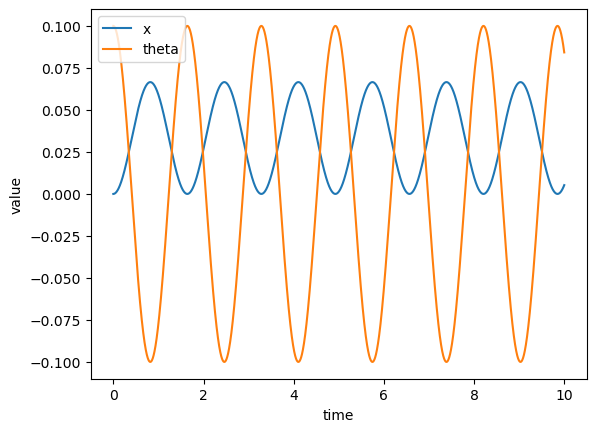

In [11]:
# Arrange lambdafiy function into array

# These functions are given
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj , tvec



# This funtion depends on the lamda and symboles being globally access-able
def system_equation(state):
    '''
    argumetn: 
    state -> array of 4 item, x,theta,xdot ,thetadot
    return -> array of 4 item, xdot, thetadot, xddot, thetaddot
    '''
    x_pos = state[0]
    theta_pos =state[1]
    x_v = state[2]
    theta_v = state[3]
    x_a =  p7_lambda_dict[x_ddot](x_pos,theta_pos,x_v,theta_v)
    theta_a = p7_lambda_dict[theta_ddot](x_pos,theta_pos,x_v,theta_v)

    return np.array([x_v,theta_v,x_a ,theta_a])

# initial state, same as q7
s0 = np.array([0,0.1 , 0 , 0])
t_range = [0,10]
p8_traj ,p8_tvec = simulate(system_equation , s0 , t_range , 0.001 , integrate)

md_print('''
### Problem 8 solution
''')
plt.figure(1)
plt.plot(p8_tvec, p8_traj[0] , label = "x" )
plt.plot(p8_tvec, p8_traj[1] , label = "theta")
plt.xlabel("time")
plt.ylabel("value")
plt.legend()
plt.plot()


## Collaboration list

* Srikanth Schelbert
* Jingkun Liu
* Graham Clifford
* Zachary Alves
* Aditya Nair 
* Jialu Yu
* Jihai Zhao

This is from a local notebook, for better pdf generation.  

The file is uploaded to google drive for access. But not runned in the google Colab.

https://drive.google.com/file/d/1IMkQDTH2Yp4oxI4fxTnukvkpB8AMKLAv/view?usp=sharing